In [1]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from catboost import CatBoostClassifier

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

df = pd.concat([train, test], axis=0)

In [4]:
for i in train.columns:
  if train[i].isna().sum() > 0:
    print(i, train[i].isna().sum())

job_posted_date 1
job_state 27
feature_10 446


In [5]:
object_cols = []
for i in train.columns:
  if train[i].dtype == 'object':
    print(i, train[i].dtype)
    object_cols.append(i)

job_title object
job_posted_date object
salary_category object
job_state object
feature_1 object


In [6]:
train.head()

,obs,job_title,job_posted_date,salary_category,job_state,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,job_desc_001,job_desc_002,job_desc_003,job_desc_004,job_desc_005,job_desc_006,job_desc_007,job_desc_008,job_desc_009,job_desc_010,job_desc_011,job_desc_012,job_desc_013,job_desc_014,job_desc_015,job_desc_016,job_desc_017,job_desc_018,job_desc_019,job_desc_020,job_desc_021,job_desc_022,job_desc_023,job_desc_024,job_desc_025,job_desc_026,job_desc_027,job_desc_028,job_desc_029,job_desc_030,job_desc_031,job_desc_032,job_desc_033,job_desc_034,job_desc_035,job_desc_036,job_desc_037,job_desc_038,job_desc_039,job_desc_040,job_desc_041,job_desc_042,job_desc_043,job_desc_044,job_desc_045,job_desc_046,job_desc_047,job_desc_048,job_desc_049,job_desc_050,job_desc_051,job_desc_052,job_desc_053,job_desc_054,job_desc_055,job_desc_056,job_desc_057,job_desc_058,job_desc_059,job_desc_060,job_desc_061,job_desc_062,job_desc_063,job_desc_064,job_desc_065,job_desc_066,job_desc_067,job_desc_068,job_desc_069,job_desc_070,job_desc_071,job_desc_072,job_desc_073,job_desc_074,job_desc_075,job_desc_076,job_desc_077,job_desc_078,job_desc_079,job_desc_080,job_desc_081,job_desc_082,job_desc_083,job_desc_084,job_desc_085,job_desc_086,job_desc_087,job_desc_088,job_desc_089,job_desc_090,job_desc_091,job_desc_092,job_desc_093,job_desc_094,job_desc_095,job_desc_096,job_desc_097,job_desc_098,job_desc_099,job_desc_100,job_desc_101,job_desc_102,job_desc_103,job_desc_104,job_desc_105,job_desc_106,job_desc_107,job_desc_108,job_desc_109,job_desc_110,job_desc_111,job_desc_112,job_desc_113,job_desc_114,job_desc_115,job_desc_116,job_desc_117,job_desc_118,job_desc_119,job_desc_120,job_desc_121,job_desc_122,job_desc_123,job_desc_124,job_desc_125,job_desc_126,job_desc_127,job_desc_128,job_desc_129,job_desc_130,job_desc_131,job_desc_132,job_desc_133,job_desc_134,job_desc_135,job_desc_136,job_desc_137,job_desc_138,job_desc_139,job_desc_140,job_desc_141,job_desc_142,job_desc_143,job_desc_144,job_desc_145,job_desc_146,job_desc_147,job_desc_148,job_desc_149,job_desc_150,job_desc_151,job_desc_152,job_desc_153,job_desc_154,job_desc_155,job_desc_156,job_desc_157,job_desc_158,job_desc_159,job_desc_160,job_desc_161,job_desc_162,job_desc_163,job_desc_164,job_desc_165,job_desc_166,job_desc_167,job_desc_168,job_desc_169,job_desc_170,job_desc_171,job_desc_172,job_desc_173,job_desc_174,job_desc_175,job_desc_176,job_desc_177,job_desc_178,job_desc_179,job_desc_180,job_desc_181,job_desc_182,job_desc_183,job_desc_184,job_desc_185,job_desc_186,job_desc_187,job_desc_188,job_desc_189,job_desc_190,job_desc_191,job_desc_192,job_desc_193,job_desc_194,job_desc_195,job_desc_196,job_desc_197,job_desc_198,job_desc_199,job_desc_200,job_desc_201,job_desc_202,job_desc_203,job_desc_204,job_desc_205,job_desc_206,job_desc_207,job_desc_208,job_desc_209,job_desc_210,job_desc_211,job_desc_212,job_desc_213,job_desc_214,job_desc_215,job_desc_216,job_desc_217,job_desc_218,job_desc_219,job_desc_220,job_desc_221,job_desc_222,job_desc_223,job_desc_224,job_desc_225,job_desc_226,job_desc_227,job_desc_228,job_desc_229,job_desc_230,job_desc_231,job_desc_232,job_desc_233,job_desc_234,job_desc_235,job_desc_236,job_desc_237,job_desc_238,job_desc_239,job_desc_240,job_desc_241,job_desc_242,job_desc_243,job_desc_244,job_desc_245,job_desc_246,job_desc_247,job_desc_248,job_desc_249,job_desc_250,job_desc_251,job_desc_252,job_desc_253,job_desc_254,job_desc_255,job_desc_256,job_desc_257,job_desc_258,job_desc_259,job_desc_260,job_desc_261,job_desc_262,job_desc_263,job_desc_264,job_desc_265,job_desc_266,job_desc_267,job_desc_268,job_desc_269,job_desc_270,job_desc_271,job_desc_272,job_desc_273,job_desc_274,job_desc_275,job_desc_276,job_desc_277,job_desc_278,job_desc_279,job_desc_280,job_desc_281,job_desc_282,job_desc_283,job_desc_284,job_desc_285,job_desc_286,job_desc_287,job_desc_288,job_desc_289,job_desc_290,job_desc_291,job_desc_292,job_desc_293,job_desc_29

In [7]:
for i in object_cols:
  print(i, train[i].unique())

job_title ['Others' 'Job_Title_1' 'Job_Title_2' 'Job_Title_3' 'Job_Title_4'
 'Job_Title_5' 'Job_Title_6' 'Job_Title_7' 'Job_Title_8' 'Job_Title_9'
 'Job_Title_10' 'Job_Title_11' 'Job_Title_12' 'Job_Title_13'
 'Job_Title_14' 'Job_Title_15' 'Job_Title_16' 'Job_Title_17'
 'Job_Title_18' 'Job_Title_19' 'Job_Title_20' 'Job_Title_21'
 'Job_Title_22' 'Job_Title_23' 'Job_Title_24' 'Job_Title_25'
 'Job_Title_26' 'Job_Title_27']
job_posted_date ['2024/07' '2024/01' '2024/05' '2024/06' '2023/02' '2024/08' '2024/04'
 '2023/09' '2022/05' '2024/02' '2023/07' '2023/03' '2023/10' '2021/04'
 '2022/03' '2024/03' '2023/01' '2022/04' '2023/11' '2023/06' '2022/02'
 '2022/12' '2022/10' '2023/12' '2023/05' nan '2021/06' '2023/04' '2021/08'
 '2021/02' '2022/06' '2023/08' '2022/01' '2020/09' '2021/12' '2021/07'
 '2021/03' '2022/11' '2020/12' '2018/11' '2021/01' '2021/11']
salary_category ['High' 'Low' 'Medium']
job_state ['NY' 'CA' 'WA' 'NC' 'KY' nan 'DC' 'NJ' 'TX' 'FL' 'MA' 'VA' 'AZ' 'GA' 'IL'
 'IN' 'MD' 'TN'

In [8]:
for i in test.columns:
  if test[i].isna().sum() > 0:
    print(i, test[i].isna().sum())

job_state 13
feature_10 314


<Axes: xlabel='salary_category'>

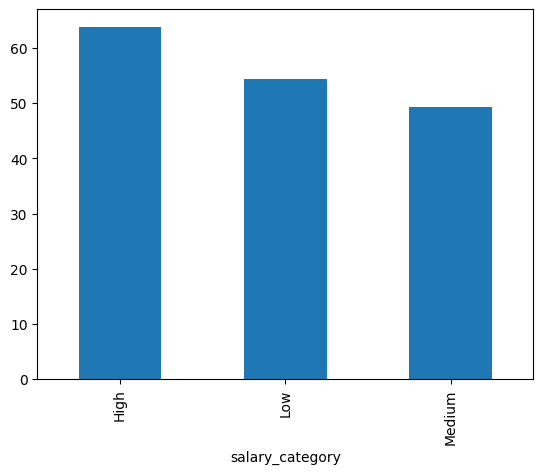

In [9]:
train.groupby('salary_category')['feature_10'].mean().plot(kind='bar')

In [10]:
df.drop(['feature_10'], axis=1, inplace=True)

In [11]:
df = df[df['job_posted_date'].notna()]


In [12]:
for i in df.columns:
  if df[i].isna().sum() > 0:
    print(i, df[i].isna().sum())

salary_category 854
job_state 40


In [13]:
df['job_state'].fillna('unknown', inplace=True)

In [14]:

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'], format='%Y/%m')
df['job_posted_month'] = df['job_posted_date'].dt.month
df['job_posted_year'] = df['job_posted_date'].dt.year

df.drop('job_posted_date', axis=1, inplace=True)

In [15]:
train = df[df['salary_category'].notna()]
test = df[df['salary_category'].isna()]
X = train.drop('salary_category', axis=1)
y = train['salary_category']

le = LabelEncoder()
y = le.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
numeric_features = x_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = x_train.select_dtypes(include=['object']).columns

In [24]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Final pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', CatBoostClassifier(verbose=False))
])

# Fit model
model.fit(x_train, y_train)

# Predict
y_pred = model.predict(x_test)

In [25]:
print(accuracy_score(y_test, y_pred))

0.73046875


In [26]:
model.fit(X, y)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['obs', 'feature_2', 'job_desc_001', 'job_desc_002', 'job_desc_003',
       'job_desc_004', 'job_desc_005', 'job_desc_006', 'job_desc_007',
       'job_desc_008',
       ...
       'job_desc_291', 'job_desc_292', 'job_desc_293', 'job_desc_294',
       'job_desc_295', 'job_desc_296', 'job_desc_297', 'job_desc_298',
       'job_desc_299', 'job_desc_300'],
      dtype='object', length=302)),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['job_title', 'job_state', 'feature_1'], dtype='object'))])),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x79bdf17bc510>)])

In [27]:
test['salary_category'] = model.predict(test.drop('salary_category', axis=1))

In [34]:
submission = pd.DataFrame({
    'obs': test['obs'],
    'salary_category': test['salary_category']

})

In [38]:
submission['salary_category'] = le.inverse_transform(submission['salary_category'])

In [39]:
submission.head()

,obs,salary_category
0,1281,High
1,1282,Medium
2,1283,High
3,1284,Low
4,1285,High


In [40]:
submission.to_csv('submission.csv', index=False)